In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [3]:
customer_data.head()

,CustomerID,Gender,Age,AnnualIncome,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
AnnualIncome              0
Spending Score (1-100)    0
dtype: int64

In [20]:
X = customer_data[["AnnualIncome","Spending Score (1-100)"]]
X

,AnnualIncome,Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [21]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

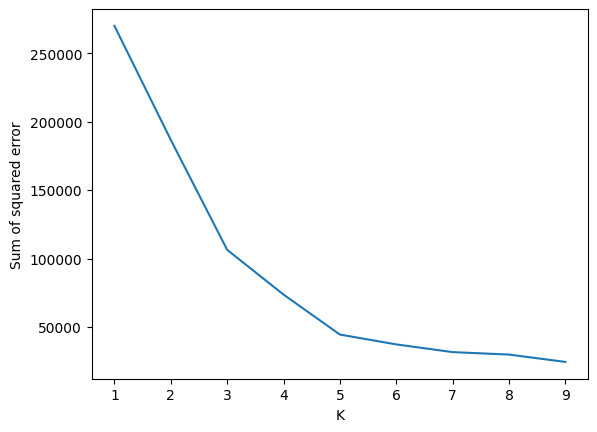

In [22]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [23]:
customer_data['cluster']=y_predicted
customer_data.head()

,CustomerID,Gender,Age,AnnualIncome,Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


In [24]:
km.cluster_centers_

array([[ 64.14814815,  41.62962963],
       [ 80.375     ,  82.9375    ],
       [ 39.17647059,  46.76470588],
       [ 80.18181818,  12.68181818],
       [ 24.95      ,  81.        ],
       [ 25.35714286,  12.14285714],
       [114.71428571,  78.42857143],
       [109.7       ,  22.        ],
       [ 57.58823529,  53.94117647]])

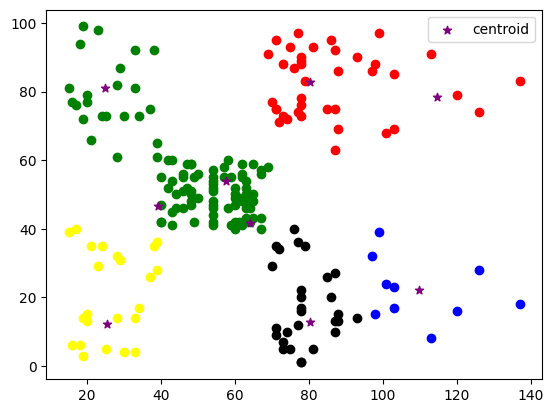

In [25]:
df1 = customer_data[customer_data.cluster==0]
df2 = customer_data[customer_data.cluster==1]
df3 = customer_data[customer_data.cluster==2]
df4 = customer_data[customer_data.cluster==3]
df5 = customer_data[customer_data.cluster==4]
plt.scatter(df1.AnnualIncome,df1['Spending Score (1-100)'],color='green')
plt.scatter(df2.AnnualIncome,df2['Spending Score (1-100)'],color='red')
plt.scatter(df3.AnnualIncome,df3['Spending Score (1-100)'],color='black')
plt.scatter(df4.AnnualIncome,df4['Spending Score (1-100)'],color='yellow')
plt.scatter(df5.AnnualIncome,df5['Spending Score (1-100)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()